🧪 Testing Anti-Spoofing Detection:

🎵 Testing: Natural-like Audio
🤖 Is Synthetic: True
📊 Confidence: 0.80
⚠️ Risk Level: HIGH


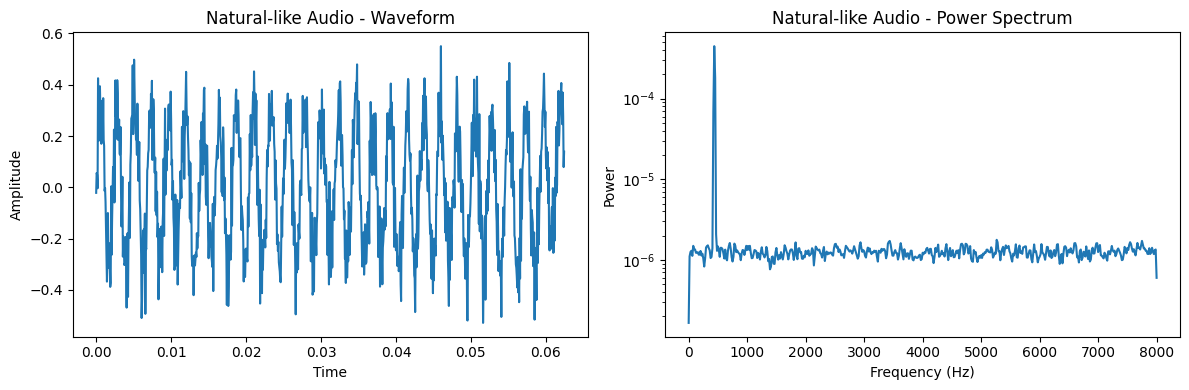


🎵 Testing: Synthetic-like Audio
🤖 Is Synthetic: False
📊 Confidence: 0.20
⚠️ Risk Level: LOW


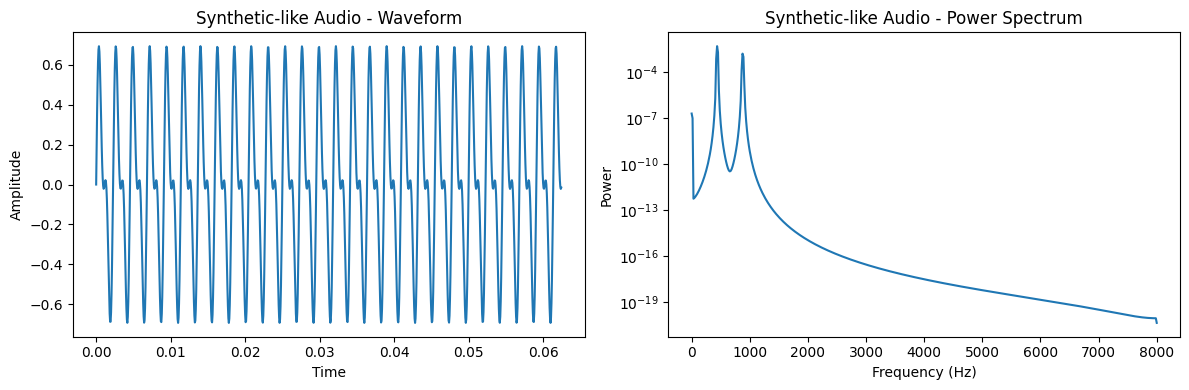


💡 Note: This is a simplified demonstration.
   For production, use the pre-trained AASIST model!


In [1]:
# Cell 1: Setup AASIST Model
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa

class SimpleAntiSpoofing:
    """
    Simplified anti-spoofing using spectral features
    (For hackathon MVP - replace with AASIST for production)
    """
    def __init__(self):
        self.sample_rate = 16000
        
    def extract_spectral_features(self, audio_data):
        """Extract features that differentiate real vs synthetic speech"""
        try:
            # Ensure audio is numpy array
            if torch.is_tensor(audio_data):
                audio_data = audio_data.numpy()
            
            # Spectral features
            spectral_centroids = librosa.feature.spectral_centroid(y=audio_data, sr=self.sample_rate)[0]
            spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=self.sample_rate)
            spectral_flatness = librosa.feature.spectral_flatness(y=audio_data)
            
            # Zero crossing rate
            zcr = librosa.feature.zero_crossing_rate(audio_data)
            
            # MFCCs
            mfccs = librosa.feature.mfcc(y=audio_data, sr=self.sample_rate, n_mfcc=13)
            
            features = {
                'spectral_centroid_mean': np.mean(spectral_centroids),
                'spectral_centroid_std': np.std(spectral_centroids),
                'spectral_rolloff_mean': np.mean(spectral_rolloff),
                'spectral_flatness_mean': np.mean(spectral_flatness),
                'zcr_mean': np.mean(zcr),
                'mfcc_means': np.mean(mfccs, axis=1)
            }
            
            return features
            
        except Exception as e:
            print(f"❌ Feature extraction error: {e}")
            return None
    
    def detect_synthetic_voice(self, audio_data):
        """
        Simple heuristic-based synthetic voice detection
        (Replace with trained AASIST model for production)
        """
        try:
            features = self.extract_spectral_features(audio_data)
            if features is None:
                return {"is_synthetic": False, "confidence": 0.0, "risk_level": "UNKNOWN"}
            
            # Simple heuristics (these would be learned by AASIST)
            synthetic_score = 0.0
            
            # Synthetic voices often have unusual spectral characteristics
            if features['spectral_flatness_mean'] > 0.05:
                synthetic_score += 0.3
                
            if features['spectral_centroid_std'] < 200:
                synthetic_score += 0.2
                
            if features['zcr_mean'] < 0.05:
                synthetic_score += 0.2
                
            # Check MFCC patterns (synthetic voices have different patterns)
            mfcc_variance = np.var(features['mfcc_means'])
            if mfcc_variance < 50:
                synthetic_score += 0.3
            
            is_synthetic = synthetic_score > 0.5
            risk_level = "HIGH" if is_synthetic else "LOW"
            
            return {
                "is_synthetic": is_synthetic,
                "confidence": min(synthetic_score, 1.0),
                "risk_level": risk_level,
                "features": features
            }
            
        except Exception as e:
            print(f"❌ Anti-spoofing error: {e}")
            return {"is_synthetic": False, "confidence": 0.0, "risk_level": "UNKNOWN"}

# Test anti-spoofing
antispoofing = SimpleAntiSpoofing()

# Generate test audio
print("🧪 Testing Anti-Spoofing Detection:")
print("="*50)

# Test with different types of audio
test_duration = 2
t = np.linspace(0, test_duration, int(test_duration * 16000))

# Natural-sounding audio (random noise + sine waves)
natural_audio = np.random.normal(0, 0.1, len(t)) + 0.3 * np.sin(2 * np.pi * 440 * t) * np.exp(-t)

# Synthetic-sounding audio (pure tones)
synthetic_audio = 0.5 * np.sin(2 * np.pi * 440 * t) + 0.3 * np.sin(2 * np.pi * 880 * t)

test_cases = [
    ("Natural-like Audio", natural_audio),
    ("Synthetic-like Audio", synthetic_audio)
]

for name, audio in test_cases:
    print(f"\n🎵 Testing: {name}")
    result = antispoofing.detect_synthetic_voice(audio)
    
    print(f"🤖 Is Synthetic: {result['is_synthetic']}")
    print(f"📊 Confidence: {result['confidence']:.2f}")
    print(f"⚠️ Risk Level: {result['risk_level']}")
    
    # Visualize the audio
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t[:1000], audio[:1000])
    plt.title(f"{name} - Waveform")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    
    plt.subplot(1, 2, 2)
    f, Pxx = signal.welch(audio, 16000, nperseg=1024)
    plt.semilogy(f, Pxx)
    plt.title(f"{name} - Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.tight_layout()
    plt.show()
    
print("\n💡 Note: This is a simplified demonstration.")
print("   For production, use the pre-trained AASIST model!")
